[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_truncated_tutorial.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# Truncated multivariate normals: a tutorial

This notebook shows how to use **Composed Multivariate Normal** distributions (CMNDs) when variables have **finite support** (e.g. $[0,1]$).

## Theoretical background

In real problems the domain of the variables is not infinite but bounded into a semi-finite region. 

If we start from the unbounded multivariate normal distribution:

$$
\mathcal{N}_k(\tilde U; \tilde \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^{k}\det \Sigma}} \exp\left[ -\frac{1}{2}(\tilde U - \tilde \mu)^{\rm T}\Sigma^{-1}(\tilde U - \tilde \mu) \right]
$$

Let $T\subset\{l,\dots,m\}$, where $l\leq k$ and $m\leq k$ be the set of indices of the truncated variables, and let $a_i<b_i$ be the truncation bounds for $i\in S$. Define the truncation region:

$$
A_S : \{\tilde U\in\mathbb{R}^k:\ a_i \le \tilde U_i \le b_i \ \ \forall\, i\in T \}
$$

with the remaining coordinates $i\notin T$ unbounded. The partially-truncated multivariate normal distribution is defined by

$$
\mathcal{TN}_T(\tilde U;\tilde\mu,\Sigma,\mathbf{a}_T,\mathbf{b}_T) = \frac{\mathcal{N}_k(\tilde U;\tilde\mu,\Sigma)\,\mathbf{1}_{A_T}(\tilde U)}{Z_ (\tilde\mu,\Sigma,\mathbf{a}_T,\mathbf{b}_T)},
$$

where $\mathbf{1}_{A_T}$ is the indicator function of $A_T$ and the normalization constant is

$$
Z_T(\tilde\mu,\Sigma,\mathbf{a}_T,\mathbf{b}_T)=
\int_{A_T}\mathcal{N}_k(\tilde T;\tilde\mu,\Sigma)\,d\tilde T
=
\mathbb{P}_{\tilde T\sim\mathcal{N}_k(\tilde\mu,\Sigma)}\left(\tilde T\in A_T\right).
$$


## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation


In [2]:
import multimin as mn
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

import warnings
warnings.filterwarnings("ignore")

figprefix = "truncated"

Welcome to MultiMin v0.9.7. ¡Al infinito y más allá!


## 1D distribution on a finite domain

Define a mixture of two Gaussians on the interval $[0, 1]$. Use the **domain** parameter: each variable can be `None` (unbounded) or `[low, high]`.

In [3]:
CMND_1d = mn.ComposedMultiVariateNormal(
    mus=[0.2, 0.8],
    weights=[0.5, 0.5],
    Sigmas=[0.01, 0.03],
    domain=[[0, 1]]  # variable 0 bounded to [0, 1]
    #domain=[None]  # variable 0 bounded to [0, 1]
)

The parameters are:

In [4]:
CMND_1d.tabulate()

,w,mu_1,sigma_1
component,,,
1,0.5,0.2,0.01
2,0.5,0.8,0.03


The function is:

In [5]:
function, cmmd = CMND_1d.get_function()

import numpy as np
from multimin import tnmd

def cmnd(X):

    a = 0.0
    b = 1.0

    mu1_1 = 0.2
    sigma1_1 = 0.01
    n1 = tnmd(X, mu1_1, sigma1_1, a, b)

    mu2_1 = 0.8
    sigma2_1 = 0.03
    n2 = tnmd(X, mu2_1, sigma2_1, a, b)

    w1 = 0.5
    w2 = 0.5

    return (
        w1*n1
        + w2*n2
    )


Sample and plot: all points lie in $[0, 1]$.

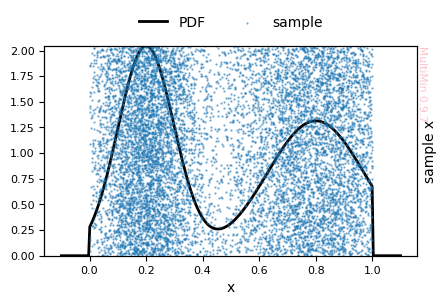

In [ ]:
# properties: list (e.g. ["x"]) or dict like DensityPlot (label and optional range per key)
G = CMND_1d.plot_sample(
    properties=["x"],
    sargs=dict(s=0.5, alpha=0.5),
    figsize=3,
)
plt.savefig(f"gallery/{figprefix}_1d_sample.png")

The PDF is zero outside the domain:

In [7]:
print("PDF at 0.5 (inside):", CMND_1d.pdf(np.array([[0.5]])))
print("PDF at -0.1 (outside):", CMND_1d.pdf(np.array([[-0.1]])))

PDF at 0.5 (inside): 0.3160530018742784
PDF at -0.1 (outside): 0.0


## Fitting 1D data on a finite domain

Generate data from the same distribution and fit with **FitCMND(..., domain=[[0, 1]])**. The fitter uses the domain in the likelihood and (by default) bounds the means to the domain.

In [8]:
np.random.seed(42)
data_1d = CMND_1d.rvs(5000)

F_1d = mn.FitCMND(data=data_1d, ngauss=2, domain=[[0, 1]])
F_1d.fit_data(advance=True)

Loading a FitCMND object.


Number of gaussians: 2
Number of variables: 1
Number of dimensions: 2
Number of samples: 5000
Domain: [[0, 1]]
Log-likelihood per point (-log L/N): 0.004026885720446497
Iterations:
Iter 0:
	Vars: [0.71, -0.71, 0.086, 0.92, -4.2, -4.2]
	LogL/N: 0.09798353864465152
Iter 1:
	Vars: [0.34, -0.33, 0.18, 0.83, -4.1, -4.1]
	LogL/N: -0.0982723211689234
Iter 2:
	Vars: [0.14, -0.13, 0.19, 0.8, -4.2, -4.1]
	LogL/N: -0.10607732072237507
Iter 3:
	Vars: [0.13, -0.13, 0.19, 0.8, -4.2, -4.1]
	LogL/N: -0.10736229255101865
Iter 4:
	Vars: [0.1, -0.098, 0.18, 0.78, -4.2, -4.2]
	LogL/N: -0.11212573281762284
Iter 5:
	Vars: [0.07, -0.068, 0.19, 0.77, -4.4, -4.2]
	LogL/N: -0.11964676828006209
Iter 6:
	Vars: [0.062, -0.06, 0.2, 0.77, -4.5, -4.2]
	LogL/N: -0.12459441808962365
Iter 7:
	Vars: [0.074, -0.072, 0.2, 0.78, -4.6, -4.2]
	LogL/N: -0.12691328458229215
Iter 8:
	Vars: [0.079, -0.076, 0.2, 0.78, -4.5, -4.2]
	LogL/N: -0.12747826628445763
Iter 9:
	Vars: [0.068, -0.066, 0.2, 0.78, -4.5, -4.2]
	LogL/N: -0.12776

In [9]:
F_1d.cmnd.tabulate(sort_by="weight")

,w,mu_1,sigma_1
component,,,
1,0.509835,0.199924,0.010318
2,0.490165,0.788830,0.028471


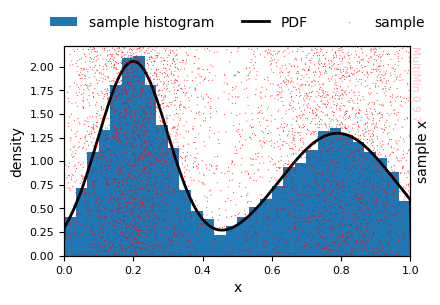

In [10]:
F_1d.plot_fit(
    properties=["x"],
    ranges=[[0, 1]],
    hargs=dict(bins=30, cmap="Spectral_r"),
    sargs=dict(s=0.5, edgecolor="None", color="r"),
    figsize=3,
)
plt.savefig(f"gallery/{figprefix}_1d_fit.png")

In [11]:
print("Fitted parameters:")
F_1d.cmnd.tabulate(sort_by="weight")

Fitted parameters:


,w,mu_1,sigma_1
component,,,
1,0.509835,0.199924,0.010318
2,0.490165,0.788830,0.028471


And the function:

In [12]:
function, cmnd = F_1d.cmnd.get_function()

import numpy as np
from multimin import tnmd

def cmnd(X):

    a = 0.0
    b = 1.0

    mu1_1 = 0.199924
    sigma1_1 = 0.010318
    n1 = tnmd(X, mu1_1, sigma1_1, a, b)

    mu2_1 = 0.78883
    sigma2_1 = 0.028471
    n2 = tnmd(X, mu2_1, sigma2_1, a, b)

    w1 = 0.509835
    w2 = 0.490165

    return (
        w1*n1
        + w2*n2
    )


## 3D distribution with one variable on a finite domain

Use **domain=[None, [0, 1], None]**: variables 0 and 2 are unbounded; variable 1 is bounded to $[0, 1]$.

In [13]:
weights = [0.5, 0.5]
mus = [[0.0, 0.3, 0.0], [0.0, 0.7, 0.0]]  # two bumps along the bounded variable (y)
sigmas = [[0.6, 0.15, 0.6], [0.6, 0.15, 0.6]]
Sigmas = [np.diag(s)**2 for s in sigmas]

CMND_3d = mn.ComposedMultiVariateNormal(
    mus=mus,
    weights=weights,
    Sigmas=Sigmas,
    domain=[None, [0, 1], None],  # only variable 1 in [0, 1]
)

Samples: the first and third coordinates are unbounded; the second coordinate lies in $[0, 1]$.

In [14]:
sample_3d = CMND_3d.rvs(3000)
print("Variable 1 (bounded) min/max:", sample_3d[:, 1].min(), sample_3d[:, 1].max())
print("All variable 1 in [0,1]:", np.all((sample_3d[:, 1] >= 0) & (sample_3d[:, 1] <= 1)))

Variable 1 (bounded) min/max: 2.0159534563357617e-06 0.9988410207612409
All variable 1 in [0,1]: True


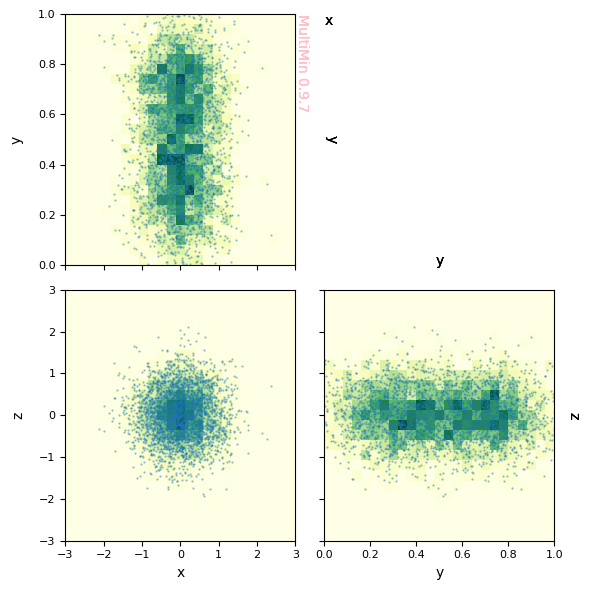

In [15]:
G3 = CMND_3d.plot_sample(
    data=sample_3d,
    properties=["x", "y", "z"],
    ranges=[[-3, 3], [0, 1], [-3, 3]],
    figsize=3,
    hargs=dict(bins=25, cmap="YlGn"),
    sargs=dict(s=0.3, alpha=0.5),
)
plt.tight_layout()
plt.savefig(f"gallery/{figprefix}_3d_sample.png")
plt.show()

## Fitting 3D data with a finite domain on one variable

Fit with `domain=[None, [0, 1], None]` so the likelihood and mean bounds respect the second variable’s domain.

In [16]:
np.random.seed(123)
data_3d = CMND_3d.rvs(5000)

F_3d = mn.FitCMND(data=data_3d, ngauss=2, domain=[None, [0, 1], None])
F_3d.fit_data(advance=True)

Loading a FitCMND object.
Number of gaussians: 2
Number of variables: 3
Number of dimensions: 6
Number of samples: 5000
Domain: [None, [0, 1], None]
Log-likelihood per point (-log L/N): 2.27007315804755
Iterations:
Iter 0:
	Vars: [-0.025, 0.025, 0.05, 0.12, 0.029, 0.64, 0.87, 0.65, -2.2, -4.4, -2.2, -2.2, -4.4, -2.2, 0.65, 1.3, 0.64, 0.9, 1.2, 0.89]
	LogL/N: 3.0902091187997494
Iter 1:
	Vars: [0.0077, -0.0077, 0.63, 0.39, 0.64, 0.45, 0.63, 0.45, -2.2, -4.3, -2.2, -2.2, -4.3, -2.2, 1.2, 1, 1.2, 1.2, 1.1, 1.2]
	LogL/N: 2.7140806504041906
Iter 2:
	Vars: [-0.012, 0.012, 0.28, 0.29, 0.27, 0.56, 0.76, 0.56, -2.2, -4.3, -2.2, -2.2, -4.3, -2.2, 0.88, 1.2, 0.87, 1, 1.1, 1]
	LogL/N: 2.265732508739141
Iter 3:
	Vars: [-0.015, 0.015, 0.22, 0.3, 0.21, 0.57, 0.76, 0.57, -2.2, -4.3, -2.2, -2.2, -4.3, -2.2, 0.83, 1.2, 0.82, 0.97, 1.1, 0.97]
	LogL/N: 2.241349170102508
Iter 4:
	Vars: [-0.022, 0.022, 0.064, 0.32, 0.042, 0.59, 0.77, 0.6, -2.3, -4.3, -2.2, -2.2, -4.3, -2.2, 0.67, 1.3, 0.66, 0.91, 1.2, 0.9]
	

Iter 6:
	Vars: [-0.0062, 0.0067, -0.032, 0.37, -0.07, 0.37, 0.76, 0.4, -2.5, -4.1, -2.5, -2.4, -4.1, -2.3, 0.54, 1.3, 0.53, 0.84, 1.2, 0.82]
	LogL/N: 2.0449009416922403
Iter 7:
	Vars: [0.023, -0.022, 0.032, 0.35, -0.012, 0.11, 0.72, 0.16, -2.7, -3.9, -2.7, -2.5, -3.9, -2.5, 0.55, 1.2, 0.55, 0.84, 1.2, 0.81]
	LogL/N: 1.9439356034723991
Iter 8:
	Vars: [0.042, -0.042, 0.2, 0.35, 0.14, -0.054, 0.69, -0.0014, -2.7, -3.8, -2.7, -2.5, -3.8, -2.5, 0.68, 1.1, 0.68, 0.9, 1.2, 0.86]
	LogL/N: 1.9128432108706954
Iter 9:
	Vars: [0.047, -0.046, 0.15, 0.32, 0.074, -0.11, 0.67, -0.05, -2.7, -3.8, -2.7, -2.6, -3.7, -2.5, 0.65, 0.96, 0.65, 0.9, 1.1, 0.84]
	LogL/N: 1.8815448805057517
Iter 10:
	Vars: [0.052, -0.051, 0.11, 0.29, -0.0017, -0.18, 0.67, -0.093, -2.7, -3.7, -2.7, -2.6, -3.7, -2.6, 0.64, 0.69, 0.61, 0.92, 0.83, 0.82]
	LogL/N: 1.8389437672542663
Iter 11:
	Vars: [0.06, -0.059, 0.095, 0.27, -0.01, -0.15, 0.69, -0.083, -2.7, -3.7, -2.7, -2.7, -3.7, -2.6, 0.67, 0.34, 0.61, 0.96, 0.53, 0.81]
	LogL/N: 

Iter 13:
	Vars: [0.074, -0.073, 0.1, 0.27, 0.065, -0.092, 0.74, -0.0097, -2.8, -3.6, -2.8, -2.7, -3.7, -2.7, 0.66, -0.044, 0.59, 0.88, 0.18, 0.72]
	LogL/N: 1.7793057659883404
Iter 14:
	Vars: [0.072, -0.071, 0.13, 0.28, 0.073, -0.1, 0.71, -0.046, -2.7, -3.6, -2.7, -2.7, -3.7, -2.7, 0.68, 0.059, 0.61, 0.9, 0.27, 0.74]
	LogL/N: 1.7754642644786898
Iter 15:
	Vars: [0.079, -0.078, 0.13, 0.31, 0.074, -0.14, 0.68, -0.11, -2.8, -3.6, -2.8, -2.8, -3.7, -2.7, 0.65, -0.03, 0.58, 0.87, 0.19, 0.71]
	LogL/N: 1.773168093865916
Iter 16:
	Vars: [0.081, -0.08, 0.14, 0.32, 0.098, -0.13, 0.7, -0.1, -2.8, -3.6, -2.8, -2.8, -3.7, -2.7, 0.63, -0.048, 0.57, 0.84, 0.16, 0.68]
	LogL/N: 1.769667113539394
Iter 17:
	Vars: [0.087, -0.086, 0.15, 0.33, 0.12, -0.085, 0.71, -0.085, -2.8, -3.7, -2.8, -2.8, -3.7, -2.7, 0.53, -0.083, 0.47, 0.72, 0.069, 0.58]
	LogL/N: 1.7635371719287214
Iter 18:
	Vars: [0.095, -0.095, 0.12, 0.32, 0.11, -0.06, 0.7, -0.062, -2.8, -3.8, -2.8, -2.8, -3.8, -2.7, 0.33, -0.069, 0.3, 0.54, -0.017, 

Iter 19:
	Vars: [0.095, -0.095, 0.084, 0.32, 0.066, -0.022, 0.71, 0.001, -2.7, -3.9, -2.7, -2.7, -3.9, -2.7, 0.16, 0.032, 0.16, 0.39, -0.015, 0.29]
	LogL/N: 1.7499525378813094
Iter 20:
	Vars: [0.096, -0.098, 0.044, 0.31, 0.019, 0.012, 0.71, 0.052, -2.7, -4, -2.7, -2.7, -4, -2.7, -0.0082, 0.1, 0.015, 0.23, -0.034, 0.16]
	LogL/N: 1.745654668985358
Iter 21:
	Vars: [0.1, -0.1, 0.032, 0.31, -0.0027, 0.014, 0.71, 0.062, -2.7, -4.1, -2.7, -2.7, -4.1, -2.7, -0.15, 0.12, -0.1, 0.098, -0.079, 0.041]
	LogL/N: 1.7427023110856854
Iter 22:
	Vars: [0.1, -0.1, 0.036, 0.29, -0.011, -0.012, 0.7, 0.034, -2.7, -4.1, -2.7, -2.8, -4.1, -2.7, -0.17, 0.099, -0.13, 0.063, -0.095, 0.0063]
	LogL/N: 1.7413358938338261


Iter 23:
	Vars: [0.1, -0.1, 0.038, 0.3, -0.0064, -0.0039, 0.71, 0.033, -2.7, -4.1, -2.8, -2.8, -4.1, -2.7, -0.17, 0.094, -0.12, 0.064, -0.095, 0.0068]
	LogL/N: 1.7401821263085324
Iter 24:
	Vars: [0.097, -0.098, 0.04, 0.3, -0.0087, -0.0011, 0.71, 0.035, -2.7, -4.1, -2.8, -2.8, -4.1, -2.7, -0.16, 0.11, -0.12, 0.066, -0.076, 0.0097]
	LogL/N: 1.739709760210247
Iter 25:
	Vars: [0.087, -0.087, 0.043, 0.3, -0.0088, 0.0041, 0.71, 0.033, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, -0.13, 0.13, -0.094, 0.062, -0.016, 0.0076]
	LogL/N: 1.7383035193290628
Iter 26:
	Vars: [0.08, -0.079, 0.034, 0.31, 0.01, 0.011, 0.71, 0.035, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, -0.069, 0.11, -0.051, 0.072, 0.02, 0.012]
	LogL/N: 1.737387839909742
Iter 27:
	Vars: [0.075, -0.074, 0.027, 0.3, 0.0078, 0.0059, 0.71, 0.033, -2.7, -4.1, -2.8, -2.8, -4.3, -2.7, -0.057, 0.089, -0.046, 0.048, 0.039, -0.012]
	LogL/N: 1.737135856037477
Iter 28:
	Vars: [0.076, -0.075, 0.036, 0.3, 0.015, -0.01, 0.71, 0.018, -2.7, -4.1, -2.8, -2.8, -4.2, -2

Iter 29:
	Vars: [0.079, -0.078, 0.033, 0.3, 0.01, -0.0064, 0.71, 0.024, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, -0.034, 0.055, -0.028, 0.066, 0.024, 0.0011]
	LogL/N: 1.7365021623086576
Iter 30:
	Vars: [0.08, -0.079, 0.033, 0.3, 0.0027, -0.0039, 0.71, 0.026, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, -0.018, 0.033, -0.018, 0.065, 0.025, -0.0022]
	LogL/N: 1.7362013544790753
Iter 31:
	Vars: [0.08, -0.079, 0.038, 0.3, -0.0015, -0.0038, 0.71, 0.026, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.0042, 0.0089, -0.0056, 0.064, 0.031, -0.0068]
	LogL/N: 1.7360482588681312
Iter 32:
	Vars: [0.08, -0.079, 0.04, 0.3, -0.00046, -0.0037, 0.71, 0.026, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.0099, 0.0077, -0.0014, 0.07, 0.033, -0.0025]
	LogL/N: 1.7360385217549286
Iter 33:
	Vars: [0.08, -0.079, 0.04, 0.3, -0.00042, -0.0057, 0.71, 0.025, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.014, 0.0056, -0.00011, 0.07, 0.036, -0.0041]
	LogL/N: 1.736023213336417
Iter 34:
	Vars: [0.079, -0.078, 0.04, 0.3, -0.00019, -0.0067, 0.71, 0.025, -2.7, 

Iter 35:
	Vars: [0.078, -0.077, 0.04, 0.3, 0.00043, -0.0066, 0.71, 0.025, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.014, 0.01, -0.0035, 0.069, 0.041, -0.0071]
	LogL/N: 1.7360131965359327
Iter 36:
	Vars: [0.078, -0.077, 0.039, 0.3, 0.00036, -0.006, 0.71, 0.025, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.013, 0.011, -0.0057, 0.068, 0.042, -0.0087]
	LogL/N: 1.7360084623351257
Iter 37:
	Vars: [0.075, -0.074, 0.039, 0.3, -0.0004, -0.0046, 0.71, 0.026, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.013, 0.013, -0.012, 0.066, 0.043, -0.014]
	LogL/N: 1.7359979622886204
Iter 38:
	Vars: [0.072, -0.07, 0.039, 0.3, -0.0013, -0.0044, 0.71, 0.026, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.014, 0.013, -0.017, 0.066, 0.045, -0.019]
	LogL/N: 1.7359875604757355
Iter 39:
	Vars: [0.061, -0.059, 0.039, 0.3, -0.0031, -0.0043, 0.71, 0.029, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.02, 0.013, -0.03, 0.065, 0.05, -0.032]
	LogL/N: 1.735965351401425
Iter 40:
	Vars: [0.059, -0.057, 0.039, 0.3, -0.0035, -0.0044, 0.71, 0.029, -2.7, -4.1, -2

Iter 41:
	Vars: [0.055, -0.052, 0.04, 0.3, -0.0043, -0.0051, 0.71, 0.03, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.024, 0.01, -0.035, 0.065, 0.052, -0.038]
	LogL/N: 1.7359563009946668
Iter 42:
	Vars: [0.052, -0.05, 0.041, 0.3, -0.0044, -0.0057, 0.71, 0.03, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.026, 0.0088, -0.036, 0.066, 0.052, -0.039]
	LogL/N: 1.7359525389408097
Iter 43:
	Vars: [0.05, -0.047, 0.041, 0.3, -0.0043, -0.0066, 0.71, 0.03, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.028, 0.0068, -0.036, 0.068, 0.05, -0.039]
	LogL/N: 1.7359482004064744
Iter 44:
	Vars: [0.046, -0.043, 0.041, 0.3, -0.0041, -0.0072, 0.71, 0.029, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.03, 0.0052, -0.037, 0.071, 0.047, -0.039]
	LogL/N: 1.7359434228143686
Iter 45:
	Vars: [0.038, -0.034, 0.042, 0.3, -0.0051, -0.0072, 0.71, 0.029, -2.7, -4.1, -2.8, -2.8, -4.2, -2.7, 0.032, 0.0044, -0.041, 0.076, 0.041, -0.041]
	LogL/N: 1.735935525818419
Iter 46:
	Vars: [0.03, -0.026, 0.043, 0.3, -0.0057, -0.0079, 0.71, 0.029, -2.7, -4.1, -2.8,

Iter 48:
	Vars: [0.032, -0.028, 0.042, 0.3, -0.0053, -0.0067, 0.71, 0.03, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.032, 0.006, -0.044, 0.078, 0.037, -0.042]
	LogL/N: 1.7359263238336633
Iter 49:
	Vars: [0.03, -0.025, 0.042, 0.3, -0.005, -0.0067, 0.71, 0.03, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.032, 0.0072, -0.045, 0.079, 0.037, -0.042]
	LogL/N: 1.7359243429702984
Iter 50:
	Vars: [0.023, -0.018, 0.042, 0.3, -0.0045, -0.0067, 0.7, 0.03, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.033, 0.01, -0.046, 0.081, 0.036, -0.041]
	LogL/N: 1.7359193138768558
Iter 51:
	Vars: [0.013, -0.0074, 0.042, 0.3, -0.0037, -0.0069, 0.7, 0.03, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.033, 0.016, -0.043, 0.083, 0.037, -0.038]
	LogL/N: 1.735916139589077
Iter 52:
	Vars: [0.0032, 0.0025, 0.043, 0.29, -0.0035, -0.0076, 0.7, 0.029, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.036, 0.019, -0.042, 0.086, 0.036, -0.036]
	LogL/N: 1.7359081155855511
Iter 53:
	Vars: [0.0023, 0.0034, 0.043, 0.29, -0.0038, -0.0079, 0.7, 0.029, -2.7, -4.2, -2.8

Iter 54:
	Vars: [-0.0011, 0.0069, 0.043, 0.29, -0.0039, -0.0079, 0.7, 0.028, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.038, 0.019, -0.036, 0.087, 0.037, -0.031]
	LogL/N: 1.7359022281807237
Iter 55:
	Vars: [-0.0037, 0.0096, 0.044, 0.29, -0.0039, -0.0076, 0.7, 0.028, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.039, 0.018, -0.033, 0.086, 0.038, -0.029]
	LogL/N: 1.735899605193067
Iter 56:
	Vars: [-0.012, 0.018, 0.043, 0.29, -0.0032, -0.007, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.04, 0.018, -0.026, 0.084, 0.04, -0.023]
	LogL/N: 1.7358952265407956
Iter 57:
	Vars: [-0.016, 0.022, 0.043, 0.29, -0.0029, -0.0071, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.041, 0.017, -0.024, 0.083, 0.039, -0.022]
	LogL/N: 1.7358935779684135
Iter 58:
	Vars: [-0.018, 0.025, 0.043, 0.29, -0.0024, -0.0068, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.04, 0.015, -0.022, 0.08, 0.039, -0.021]
	LogL/N: 1.7358902942305583
Iter 59:
	Vars: [-0.022, 0.029, 0.042, 0.29, -0.0019, -0.0066, 0.7, 0.027, -2.7, -4.2, 

Iter 61:
	Vars: [-0.029, 0.036, 0.042, 0.29, -0.0021, -0.0063, 0.7, 0.026, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.038, 0.012, -0.023, 0.074, 0.039, -0.02]
	LogL/N: 1.7358839623948639
Iter 62:
	Vars: [-0.036, 0.044, 0.043, 0.29, -0.0024, -0.0065, 0.7, 0.026, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.037, 0.011, -0.024, 0.072, 0.037, -0.021]
	LogL/N: 1.7358824195469933
Iter 63:
	Vars: [-0.038, 0.045, 0.043, 0.29, -0.0024, -0.0064, 0.7, 0.026, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.036, 0.011, -0.024, 0.072, 0.037, -0.02]
	LogL/N: 1.7358820539931694
Iter 64:
	Vars: [-0.037, 0.045, 0.043, 0.29, -0.0025, -0.0063, 0.7, 0.026, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.036, 0.012, -0.024, 0.072, 0.037, -0.02]
	LogL/N: 1.73588135193038
Iter 65:
	Vars: [-0.038, 0.045, 0.043, 0.29, -0.0026, -0.0059, 0.7, 0.026, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.034, 0.013, -0.025, 0.07, 0.037, -0.02]
	LogL/N: 1.7358805907928854
Iter 66:
	Vars: [-0.038, 0.046, 0.042, 0.29, -0.0026, -0.0057, 0.7, 0.026, -2.7, -4.2, -2.8,

Iter 68:
	Vars: [-0.037, 0.044, 0.042, 0.29, -0.0027, -0.0055, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.031, 0.012, -0.027, 0.067, 0.038, -0.022]
	LogL/N: 1.7358797764702534
Iter 69:
	Vars: [-0.037, 0.044, 0.042, 0.29, -0.0027, -0.0055, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.031, 0.012, -0.027, 0.067, 0.038, -0.022]
	LogL/N: 1.7358797532552446
Iter 70:
	Vars: [-0.037, 0.044, 0.042, 0.29, -0.0027, -0.0056, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.031, 0.012, -0.027, 0.067, 0.038, -0.022]
	LogL/N: 1.7358797454082662
Iter 71:
	Vars: [-0.037, 0.045, 0.042, 0.29, -0.0027, -0.0056, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.031, 0.012, -0.027, 0.067, 0.038, -0.022]
	LogL/N: 1.735879731292599
Iter 72:
	Vars: [-0.038, 0.045, 0.042, 0.29, -0.0027, -0.0056, 0.7, 0.027, -2.7, -4.2, -2.8, -2.8, -4.2, -2.7, 0.031, 0.012, -0.026, 0.068, 0.038, -0.022]
	LogL/N: 1.7358797161806396
Iter 73:
	Vars: [-0.039, 0.046, 0.042, 0.29, -0.0027, -0.0056, 0.7, 0.027, -2.7, -4.2,

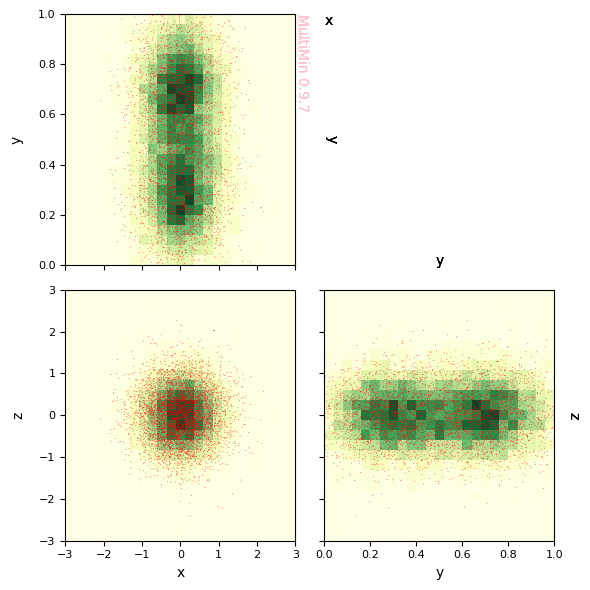

In [17]:
F_3d.plot_fit(
    properties=["x", "y", "z"],
    ranges=[[-3, 3], [0, 1], [-3, 3]],
    hargs=dict(bins=25, cmap="YlGn"),
    sargs=dict(s=0.3, edgecolor="None", color="r"),
    figsize=3,
)
plt.tight_layout()
plt.savefig(f"gallery/{figprefix}_3d_fit.png")
plt.show()

In [18]:
CMND_3d.tabulate(sort_by="distance")

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.5,0.0,0.3,0.0,0.6,0.15,0.6,0.0,0.0,0.0
2,0.5,0.0,0.7,0.0,0.6,0.15,0.6,0.0,0.0,0.0


In [19]:
print("Fitted parameters (note variable 2 = y in [0,1]):")
F_3d.cmnd.tabulate(sort_by="distance")

Fitted parameters (note variable 2 = y in [0,1]):


,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.489455,0.042126,0.291250,-0.002683,0.605644,0.150459,0.595910,0.015416,0.005950,-0.013201
2,0.510545,-0.005589,0.699513,0.026577,0.591069,0.151054,0.610339,0.033821,0.018985,-0.010914


And the function is:

In [20]:
function, cmnd = F_3d.cmnd.get_function()

import numpy as np
from multimin import tnmd

def cmnd(X):

    a = [-np.inf, 0.0, -np.inf]
    b = [np.inf, 1.0, np.inf]

    mu1_1 = 0.042126
    mu1_2 = 0.29125
    mu1_3 = -0.002683
    mu1 = [mu1_1, mu1_2, mu1_3]
    Sigma1 = [[0.366805, 0.001405, 0.002147], [0.001405, 0.022638, -0.001184], [0.002147, -0.001184, 0.355108]]
    Z1 = 0.973549
    n1 = tnmd(X, mu1, Sigma1, a, b, Z=Z1)

    mu2_1 = -0.005589
    mu2_2 = 0.699513
    mu2_3 = 0.026577
    mu2 = [mu2_1, mu2_2, mu2_3]
    Sigma2 = [[0.349362, 0.00302, 0.006849], [0.00302, 0.022817, -0.001006], [0.006849, -0.001006, 0.372513]]
    Z2 = 0.976663
    n2 = tnmd(X, mu2, Sigma2, a, b, Z=Z2)

    w1 = 0.489455
    w2 = 0.510545

    return (
        w1*n1
        + w2*n2
    )


In [21]:
X = np.array([[0.0, 0.3, 1.2]])
cmnd(X), F_3d.cmnd.pdf(X)

(0.07924013295046034, 0.07924082072895162)

And in LaTeX:

In [22]:
function, _ = F_3d.cmnd.get_function(type="latex")
display(Markdown(function))

Finite domain. The following variables are truncated (the rest are unbounded):

- Variable $x_{2}$ (index 2): domain $[0.0, 1.0]$.

Truncation region: $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$, with $T$ the set of truncated indices.

$$f(\mathbf{x}) = w_1 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1, \mathbf{a}_T, \mathbf{b}_T) + w_2 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2, \mathbf{a}_T, \mathbf{b}_T)$$

where

Bounds (vectors): $\mathbf{a}_T = (-\infty, 0.0, -\infty)^\top$, $\mathbf{b}_T = (\infty, 1.0, \infty)^\top$.

$$w_1 = 0.489455$$
$$\boldsymbol{\mu}_1 = \left( \begin{array}{c} 0.042126 \\ 0.29125 \\ -0.002683 \end{array}\right)$$
$$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc} 0.366805 & 0.001405 & 0.002147 \\ 0.001405 & 0.022638 & -0.001184 \\ 0.002147 & -0.001184 & 0.355108 \end{array}\right)$$

$$w_2 = 0.510545$$
$$\boldsymbol{\mu}_2 = \left( \begin{array}{c} -0.005589 \\ 0.699513

Finite domain. The following variables are truncated (the rest are unbounded):

- Variable $x_{2}$ (index 2): domain $[0.0, 1.0]$.

Truncation region: $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$, with $T$ the set of truncated indices.

$$f(\mathbf{x}) = w_1 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1, \mathbf{a}_T, \mathbf{b}_T) + w_2 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2, \mathbf{a}_T, \mathbf{b}_T)$$

where

Bounds (vectors): $\mathbf{a}_T = (-\infty, 0.0, -\infty)^\top$, $\mathbf{b}_T = (\infty, 1.0, \infty)^\top$.

$$w_1 = 0.489455$$
$$\boldsymbol{\mu}_1 = \left( \begin{array}{c} 0.042126 \\ 0.29125 \\ -0.002683 \end{array}\right)$$
$$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc} 0.366805 & 0.001405 & 0.002147 \\ 0.001405 & 0.022638 & -0.001184 \\ 0.002147 & -0.001184 & 0.355108 \end{array}\right)$$

$$w_2 = 0.510545$$
$$\boldsymbol{\mu}_2 = \left( \begin{array}{c} -0.005589 \\ 0.699513 \\ 0.026577 \end{array}\right)$$
$$\mathbf{\Sigma}_2 = \left( \begin{array}{ccc} 0.349362 & 0.00302 & 0.006849 \\ 0.00302 & 0.022817 & -0.001006 \\ 0.006849 & -0.001006 & 0.372513 \end{array}\right)$$

Truncated normal. The unbounded normal is

$$\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^{{k}} \det \mathbf{\Sigma}}} \exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\top} \mathbf{\Sigma}^{{-1}} (\mathbf{x}-\boldsymbol{\mu})\right].$$

The truncation region is $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$. The partially truncated normal is

$$\mathcal{TN}_T(\tilde{U}; \tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \frac{\mathcal{N}(\tilde{U}; \tilde{\mu}, \Sigma) \, \mathbf{1}_{A_T}(\tilde{U})}{Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T)},$$

where $\mathbf{1}_{A_T}$ is the indicator of $A_T$ and the normalization constant is

$$Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \int_{A_T} \mathcal{N}(\tilde{T}; \tilde{\mu}, \Sigma) \, d\tilde{T} = \mathbb{P}_{\tilde{T} \sim \mathcal{N}(\tilde{\mu},\Sigma)}(\tilde{T} \in A_T).$$

Finite domain. The following variables are truncated (the rest are unbounded):

- Variable $x_2$ (index 2): domain $[0.0, 1.0]$.

Truncation region: $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$, with $T$ the set of truncated indices.

$$f(\mathbf{x}) = w_1 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1, \mathbf{a}_T, \mathbf{b}_T) + w_2 \, \mathcal{TN}_T(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2, \mathbf{a}_T, \mathbf{b}_T)$$

where

Bounds (vectors): $\mathbf{a}_T = (-\infty, 0.0, -\infty)^\top$, $\mathbf{b}_T = (\infty, 1.0, \infty)^\top$.

$$w_1 = 0.489088$$
$$\boldsymbol{\mu}_1 = \left( \begin{array}{c} 0.042197 \\ 0.291123 \\ -0.00285 \end{array}\right)$$
$$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc} 0.366817 & 0.001419 & 0.00217 \\ 0.001419 & 0.022609 & -0.00123 \\ 0.00217 & -0.00123 & 0.355096 \end{array}\right)$$

$$w_2 = 0.510912$$
$$\boldsymbol{\mu}_2 = \left( \begin{array}{c} -0.005599 \\ 0.699398 \\ 0.026692 \end{array}\right)$$
$$\mathbf{\Sigma}_2 = \left( \begin{array}{ccc} 0.349353 & 0.003032 & 0.006884 \\ 0.003032 & 0.022845 & -0.001046 \\ 0.006884 & -0.001046 & 0.37253 \end{array}\right)$$

Truncated normal. The unbounded normal is

$$\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^{{k}} \det \mathbf{\Sigma}}} \exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\top} \mathbf{\Sigma}^{{-1}} (\mathbf{x}-\boldsymbol{\mu})\right].$$

The truncation region is $A_T = \{\tilde{U} \in \mathbb{R}^k : a_i \le \tilde{U}_i \le b_i \;\forall i \in T\}$. The partially truncated normal is

$$\mathcal{TN}_T(\tilde{U}; \tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \frac{\mathcal{N}(\tilde{U}; \tilde{\mu}, \Sigma) \, \mathbf{1}_{A_T}(\tilde{U})}{Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T)},$$

where $\mathbf{1}_{A_T}$ is the indicator of $A_T$ and the normalization constant is

$$Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T) = \int_{A_T} \mathcal{N}(\tilde{T}; \tilde{\mu}, \Sigma) \, d\tilde{T} = \mathbb{P}_{\tilde{T} \sim \mathcal{N}(\tilde{\mu},\Sigma)}(\tilde{T} \in A_T).$$

---
**MultiMin** – Multivariate Gaussian fitting with finite domains  
© 2026 Jorge I. Zuluaga